In [34]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [35]:
train_df = pd.read_csv("/home/student/filtered_train_df_0705.csv")

In [36]:
train_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Label,max_ICULOS,time_bm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,0.0,-0.02,1,0,15354,0,46,-45
1,85.0,97.0,NaN,88.0,58.0,NaN,23.0,NaN,NaN,NaN,...,1,1.0,0.0,-0.02,2,0,15354,0,46,-44
2,80.0,98.0,NaN,89.0,54.0,NaN,19.0,NaN,NaN,NaN,...,1,1.0,0.0,-0.02,3,0,15354,0,46,-43
3,75.0,97.0,NaN,84.0,51.0,NaN,22.0,NaN,NaN,NaN,...,1,1.0,0.0,-0.02,4,0,15354,0,46,-42
4,77.0,95.0,36.5,88.0,56.0,NaN,27.0,NaN,NaN,NaN,...,1,1.0,0.0,-0.02,5,0,15354,0,46,-41


In [37]:
frequency_used_attributes = ['BaseExcess',  'FiO2', 'pH', 'PaCO2', 'Glucose','Lactate', 'PTT']
values_used_attributes = [ 'Hct',  'Glucose','Potassium']
constant_attributes = ['ID','max_ICULOS','Gender']
other_attributes = ['time_bm','HR','MAP','O2Sat', 'Resp','SBP','ICULOS']
label_attributes= ['Label','SepsisLabel']

In [38]:
def add_rolling_window(df, attr, window_size):
    df = df.sort_values(by=['ID','ICULOS'], ascending =[True,True])
    rolling = df[['ID']+attr].groupby('ID').rolling(window=window_size, closed='both').count()
    rolling= rolling.rename(columns={at: f'{window_size}w_sum_{at}' for at in attr})
    rolling=rolling[list(rolling.columns)[1:]].reset_index().set_index('level_1')
    combined = df.join(rolling,how='left', rsuffix= 'r')
    return combined, rolling

In [39]:
window_size=5
train_df_with_roll, train_roll = add_rolling_window(train_df,frequency_used_attributes,window_size)

/data/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:2010: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(


In [40]:
train_df_with_roll

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,max_ICULOS,time_bm,IDr,5w_sum_BaseExcess,5w_sum_FiO2,5w_sum_pH,5w_sum_PaCO2,5w_sum_Glucose,5w_sum_Lactate,5w_sum_PTT
75951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23,-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75952,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,23,-21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75953,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,23,-20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75954,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,23,-19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75955,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,23,-18,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154924,76.0,NaN,NaN,85.0,53.0,NaN,17.0,NaN,NaN,NaN,...,54,-4,19999,1.0,3.0,1.0,0.0,0.0,0.0,0.0
154925,81.0,99.0,NaN,99.0,51.0,NaN,17.0,NaN,NaN,NaN,...,54,-3,19999,1.0,2.0,1.0,0.0,0.0,0.0,0.0
154926,85.0,100.0,NaN,103.0,48.0,NaN,26.0,NaN,NaN,NaN,...,54,-2,19999,0.0,1.0,0.0,0.0,0.0,0.0,0.0
154927,86.0,93.0,NaN,87.0,44.0,NaN,22.0,NaN,NaN,NaN,...,54,-1,19999,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
frequency_used_attributes_fixed = [f'{window_size}w_sum_{x}' for x in frequency_used_attributes]

In [42]:
train_df_with_roll = train_df_with_roll[constant_attributes + other_attributes + \
                                        values_used_attributes + frequency_used_attributes_fixed + \
                                        label_attributes]
train_df_with_roll = train_df_with_roll[train_df_with_roll['time_bm']>=-10]
train_df_with_roll

,ID,max_ICULOS,Gender,time_bm,HR,MAP,O2Sat,Resp,SBP,ICULOS,...,Potassium,5w_sum_BaseExcess,5w_sum_FiO2,5w_sum_pH,5w_sum_PaCO2,5w_sum_Glucose,5w_sum_Lactate,5w_sum_PTT,Label,SepsisLabel
75963,0,23,0,-10,62.0,72.0,95.0,12.0,139.0,13,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
75964,0,23,0,-9,63.0,75.0,95.0,11.0,143.0,14,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
75965,0,23,0,-8,63.0,81.0,97.0,11.0,154.0,15,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
75966,0,23,0,-7,58.0,58.0,94.0,10.0,114.0,16,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
75967,0,23,0,-6,54.0,50.5,97.0,12.0,NaN,17,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154924,19999,54,0,-4,76.0,53.0,NaN,17.0,85.0,50,...,NaN,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0,0
154925,19999,54,0,-3,81.0,51.0,99.0,17.0,99.0,51,...,NaN,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0
154926,19999,54,0,-2,85.0,48.0,100.0,26.0,103.0,52,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
154927,19999,54,0,-1,86.0,44.0,93.0,22.0,87.0,53,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [43]:
data_final = train_df_with_roll.groupby(['ID', 'Label','max_ICULOS','Gender']).agg({
                                                    'HR': ['median', 'max'],\
                                                    'MAP': ['median', 'min'],\
                                                    'O2Sat': 'mean',\
                                                    'Resp': ['median', 'max'],\
                                                    'SBP': ['median', 'min'],\
                                                    'Hct': ['median', 'min'],\
                                                    'Potassium': 'mean',\
                                                    'Glucose': 'mean',\
                                                    f'{window_size}w_sum_BaseExcess': 'mean',\
                                                    f'{window_size}w_sum_FiO2': 'mean',\
                                                    f'{window_size}w_sum_pH': 'mean',\
                                                    f'{window_size}w_sum_PaCO2': 'mean',\
                                                    f'{window_size}w_sum_Glucose': 'mean',\
                                                    f'{window_size}w_sum_Lactate': 'mean',\
                                                    f'{window_size}w_sum_PTT': 'mean'}).reset_index()

data_final.columns = ['__'.join(col).strip() for col in data_final.columns.values]
data_final.rename(columns={"ID__": "ID", "Label__": "Label", "max_ICULOS__":"max_ICULOS", "Gender__":"Gender"}, inplace=True)

data_final

,ID,Label,max_ICULOS,Gender,HR__median,HR__max,MAP__median,MAP__min,O2Sat__mean,Resp__median,...,Hct__min,Potassium__mean,Glucose__mean,5w_sum_BaseExcess__mean,5w_sum_FiO2__mean,5w_sum_pH__mean,5w_sum_PaCO2__mean,5w_sum_Glucose__mean,5w_sum_Lactate__mean,5w_sum_PTT__mean
0,0,0,23,0,58.0,63.0,58.00,50.50,95.909091,11.5,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.272727,0.0,0.000000
1,2,0,38,1,81.0,89.0,99.00,75.67,95.500000,18.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.454545,0.0,0.454545
2,3,0,48,1,71.0,86.0,88.00,74.33,96.727273,17.0,...,39.8,3.90,169.0,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.272727
3,4,0,24,1,98.0,107.0,84.00,76.00,95.181818,18.0,...,NaN,NaN,123.0,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.000000
4,5,0,25,1,63.5,69.0,83.00,65.00,97.400000,22.0,...,31.4,4.95,118.8,0.000000,0.000000,0.000000,0.000000,2.727273,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,19995,0,29,1,109.0,117.0,83.00,74.00,97.100000,19.5,...,33.0,NaN,NaN,0.000000,0.545455,0.363636,0.000000,0.363636,0.0,0.000000
15996,19996,0,43,1,63.0,78.0,113.00,95.00,99.090909,16.0,...,NaN,NaN,NaN,0.545455,1.545455,0.545455,0.545455,0.000000,0.0,0.000000
15997,19997,0,15,0,73.0,80.0,90.00,80.67,98.318182,17.0,...,29.2,3.60,112.0,0.000000,0.000000,0.000000,0.000000,0.545455,0.0,0.545455
15998,19998,0,42,1,84.0,94.0,76.50,72.00,97.166667,16.0,...,29.9,4.20,137.0,0.000000,0.000000,0.545455,0.000000,0.545455,0.0,0.000000


In [11]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   Label                    16000 non-null  int64  
 2   max_ICULOS               16000 non-null  int64  
 3   Gender                   16000 non-null  int64  
 4   HR__median               15809 non-null  float64
 5   HR__max                  15809 non-null  float64
 6   MAP__median              15708 non-null  float64
 7   MAP__min                 15708 non-null  float64
 8   O2Sat__mean              15714 non-null  float64
 9   Resp__median             15690 non-null  float64
 10  Resp__max                15690 non-null  float64
 11  SBP__median              15355 non-null  float64
 12  SBP__min                 15355 non-null  float64
 13  Hct__median              9054 non-null   float64
 14  Hct__min              

### Imputing With KNNImputer

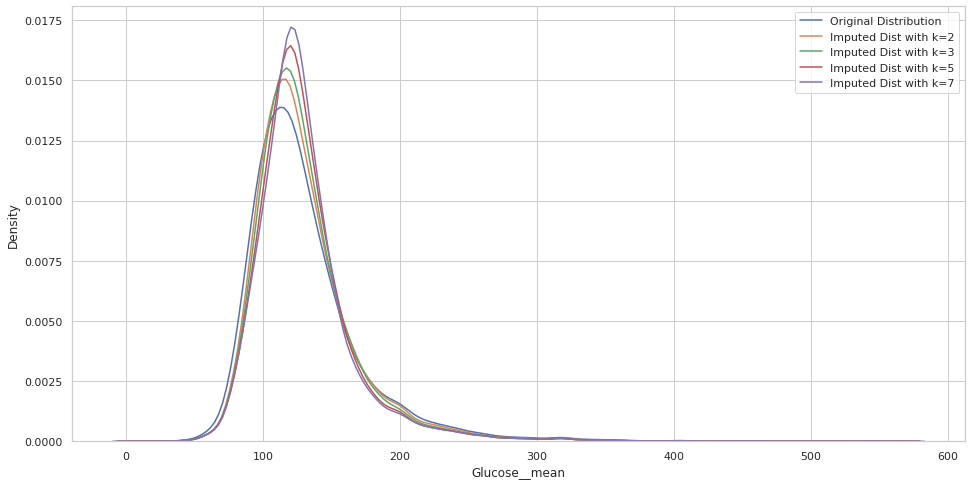

In [13]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(data_final.Glucose__mean, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    data_knn_imputed.loc[:, :] = knn_imp.fit_transform(data_final)
    sns.kdeplot(data_knn_imputed.Glucose__mean, label=f"Imputed Dist with k={k}")

plt.legend();

In [44]:
from sklearn.impute import KNNImputer

# Copy the data
data_knn_imputed = data_final.copy(deep=True)

# Init the transformer
knn_imp = KNNImputer(n_neighbors=3)

# Fit/transform
data_knn_imputed.loc[:, :] = knn_imp.fit_transform(data_knn_imputed)

# data_knn_imputed.isnull().sum()

In [16]:
data_final

,ID,Label,max_ICULOS,Gender,HR__median,HR__max,MAP__median,MAP__min,O2Sat__mean,Resp__median,...,Hct__min,Potassium__mean,Glucose__mean,5w_sum_BaseExcess__mean,5w_sum_FiO2__mean,5w_sum_pH__mean,5w_sum_PaCO2__mean,5w_sum_Glucose__mean,5w_sum_Lactate__mean,5w_sum_PTT__mean
0,0,0,23,0,58.0,63.0,58.00,50.50,95.909091,11.5,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.272727,0.0,0.000000
1,2,0,38,1,81.0,89.0,99.00,75.67,95.500000,18.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.454545,0.0,0.454545
2,3,0,48,1,71.0,86.0,88.00,74.33,96.727273,17.0,...,39.8,3.90,169.0,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.272727
3,4,0,24,1,98.0,107.0,84.00,76.00,95.181818,18.0,...,NaN,NaN,123.0,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.000000
4,5,0,25,1,63.5,69.0,83.00,65.00,97.400000,22.0,...,31.4,4.95,118.8,0.000000,0.000000,0.000000,0.000000,2.727273,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,19995,0,29,1,109.0,117.0,83.00,74.00,97.100000,19.5,...,33.0,NaN,NaN,0.000000,0.545455,0.363636,0.000000,0.363636,0.0,0.000000
15996,19996,0,43,1,63.0,78.0,113.00,95.00,99.090909,16.0,...,NaN,NaN,NaN,0.545455,1.545455,0.545455,0.545455,0.000000,0.0,0.000000
15997,19997,0,15,0,73.0,80.0,90.00,80.67,98.318182,17.0,...,29.2,3.60,112.0,0.000000,0.000000,0.000000,0.000000,0.545455,0.0,0.545455
15998,19998,0,42,1,84.0,94.0,76.50,72.00,97.166667,16.0,...,29.9,4.20,137.0,0.000000,0.000000,0.545455,0.000000,0.545455,0.0,0.000000


In [15]:
data_knn_imputed

,ID,Label,max_ICULOS,Gender,HR__median,HR__max,MAP__median,MAP__min,O2Sat__mean,Resp__median,...,Hct__min,Potassium__mean,Glucose__mean,5w_sum_BaseExcess__mean,5w_sum_FiO2__mean,5w_sum_pH__mean,5w_sum_PaCO2__mean,5w_sum_Glucose__mean,5w_sum_Lactate__mean,5w_sum_PTT__mean
0,0.0,0.0,23.0,0.0,58.0,63.0,58.00,50.50,95.909091,11.5,...,34.966667,4.283333,149.100000,0.000000,0.000000,0.000000,0.000000,0.272727,0.0,0.000000
1,2.0,0.0,38.0,1.0,81.0,89.0,99.00,75.67,95.500000,18.0,...,33.066667,4.533333,159.333333,0.000000,0.000000,0.000000,0.000000,0.454545,0.0,0.454545
2,3.0,0.0,48.0,1.0,71.0,86.0,88.00,74.33,96.727273,17.0,...,39.800000,3.900000,169.000000,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.272727
3,4.0,0.0,24.0,1.0,98.0,107.0,84.00,76.00,95.181818,18.0,...,29.366667,3.933333,123.000000,0.000000,0.000000,0.000000,0.000000,1.181818,0.0,0.000000
4,5.0,0.0,25.0,1.0,63.5,69.0,83.00,65.00,97.400000,22.0,...,31.400000,4.950000,118.800000,0.000000,0.000000,0.000000,0.000000,2.727273,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,19995.0,0.0,29.0,1.0,109.0,117.0,83.00,74.00,97.100000,19.5,...,33.000000,4.200000,127.000000,0.000000,0.545455,0.363636,0.000000,0.363636,0.0,0.000000
15996,19996.0,0.0,43.0,1.0,63.0,78.0,113.00,95.00,99.090909,16.0,...,30.533333,3.900000,130.000000,0.545455,1.545455,0.545455,0.545455,0.000000,0.0,0.000000
15997,19997.0,0.0,15.0,0.0,73.0,80.0,90.00,80.67,98.318182,17.0,...,29.200000,3.600000,112.000000,0.000000,0.000000,0.000000,0.000000,0.545455,0.0,0.545455
15998,19998.0,0.0,42.0,1.0,84.0,94.0,76.50,72.00,97.166667,16.0,...,29.900000,4.200000,137.000000,0.000000,0.000000,0.545455,0.000000,0.545455,0.0,0.000000


### Imputing With Iterative Imputer


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Copy the data
data_ii_imputed = data_final.copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
)

# Tranform
data_ii_imputed.loc[:, :] = ii_imp.fit_transform(data_ii_imputed)

data_ii_imputed.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split

X_full = data_final.loc[:, data_final.columns != 'Label'].copy()
y_full = data_final.loc[:, data_final.columns == 'Label'].values.reshape(-1,1)

from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Set global configs
cv = 5
scoring = "accuracy"
state = 1121218
forest = RandomForestClassifier()

# Store IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [BayesianRidge(), ExtraTreesRegressor()]:
    pipe = make_pipeline(
        IterativeImputer(estimator=estimator, random_state=state), forest
    )
    ii_scores[estimator.__class__.__name__] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2, 3, 5, 7, 9]
for k in n_neighbors:
    pipe = make_pipeline (KNNImputer(n_neighbors=k), forest)
    knn_scores[f"KNN(k = {k})"] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Combines scores into a single DF
final_scores = pd.concat(
    [ii_scores, knn_scores],
    axis=1,
    keys=["iterative_imputer", "knn_imputer"],
)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

means, errors = final_scores.mean().sort_values(ascending=False), final_scores.std()
means.plot.barh(xerr=errors, ax=ax)

ax.set_title("Dataset Classification With Different Imputation Methods")
ax.set_xlabel("Accuracy")
ax.set_yticks(np.arange(means.shape[0]))

plt.tight_layout(pad=1)
plt.show();

In [17]:
# Check the numbers of our data
print("length of data is",len(data_final))
print("Number of Label=0 in data",len(data_final[data_final['Label']==0]))
print("Number of Label=1 in data",len(data_final[data_final['Label']==1]))
print("Proportion of Label=0 data in data is ",len(data_final[data_final['Label']==0])/len(data_final))
print("Proportion of Label=1 data in data is ",len(data_final[data_final['Label']==1])/len(data_final))

length of data is 16000
Number of Label=0 in data 14857
Number of Label=1 in data 1143
Proportion of Label=0 data in data is  0.9285625
Proportion of Label=1 data in data is  0.0714375


## Over-sampling using SMOTE

With our training data created, We’ll up-sample the minor class (Label=1) using the SMOTE algorithm (Synthetic Minority Oversampling Technique)

In [45]:
data_final = data_knn_imputed

In [46]:
X = data_final.loc[:, data_final.columns != 'Label']
y = data_final.loc[:, data_final.columns == 'Label']

from imblearn.over_sampling import SMOTE ##TODO: Insert to ENV.yml

os = SMOTE(sampling_strategy=0.2, random_state=0)
columns = X.columns
os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Label'])

# Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Label=0 in oversampled data",len(os_data_y[os_data_y['Label']==0]))
print("Number of Label=1",len(os_data_y[os_data_y['Label']==1]))
print("Proportion of Label=0 data in oversampled data is ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Proportion of Label=1 data in oversampled data is ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))

length of oversampled data is  17828
Number of Label=0 in oversampled data 14857
Number of Label=1 2971
Proportion of Label=0 data in oversampled data is  0.8333520305137985
Proportion of Label=1 data in oversampled data is  0.16664796948620147


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [28]:
data_final_vars = data_final.columns.values.tolist()
y=['Label']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=10, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/student/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/student/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[False False  True False False False False False  True  True False False
 False False  True False  True  True  True  True  True  True False]
[13  7  1  3 11  4  5  6  1  1  9  8 10 14  1 12  1  1  1  1  1  1  2]


/home/student/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The RFE has helped us select the following features:

*TODO: COMPLETE *******

## Implementing the model

In [31]:
import statsmodels.api as sm

X = os_data_X
y = os_data_y

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608954
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.121     
Dependent Variable:    Label              AIC:                36234.9000
Date:                  2022-05-08 16:47   BIC:                36425.7856
No. Observations:      29714              Log-Likelihood:     -18094.   
Df Model:              22                 LL-Null:            -20596.   
Df Residuals:          29691              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
ID                      -0.0000   0.0000 -13.1069 0

#### ADJUSTMENTS????

### Logistic Regression Model Fitting

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X, y)

/home/student/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/student/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting the test set results and calculating the accuracy


In [33]:
val_df = pd.read_csv("/home/student/filtered_val_df_0705.csv")

In [ ]:
val_df.columns

In [ ]:
X_test =
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

NameError: name 'y_test' is not defined

### Compute precision, recall, F-measure and support

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()